In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Performance_Prediction/Student_performance_data _.csv')

# Drop unnecessary columns
data = data.drop(columns=['StudentID', 'GradeClass'])

# Features and target
X = data.drop(columns=['GPA'])
y = data['GPA']


In [16]:
# Define categorical and numerical features
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                        'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [18]:
# Build a Sequential model
model = Sequential([
    Dense(64, input_dim=X_train_transformed.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Single output for GPA prediction
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_transformed, y_train, epochs=100, validation_data=(X_test_transformed, y_test), verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_transformed, y_test, verbose=0)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.3041 - mae: 1.2623 - val_loss: 0.5124 - val_mae: 0.5794
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5490 - mae: 0.5847 - val_loss: 0.1775 - val_mae: 0.3432
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3563 - mae: 0.4705 - val_loss: 0.2002 - val_mae: 0.3765
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3029 - mae: 0.4293 - val_loss: 0.1467 - val_mae: 0.3188
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2684 - mae: 0.3977 - val_loss: 0.1580 - val_mae: 0.3339
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2353 - mae: 0.3772 - val_loss: 0.1606 - val_mae: 0.3380
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2068 - mae: 0.3541 - val_loss: 0.1588 - val_mae: 0.3346
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2063 - mae: 0.3560 - val_loss: 0.2201 - val_mae: 0.4003
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.19

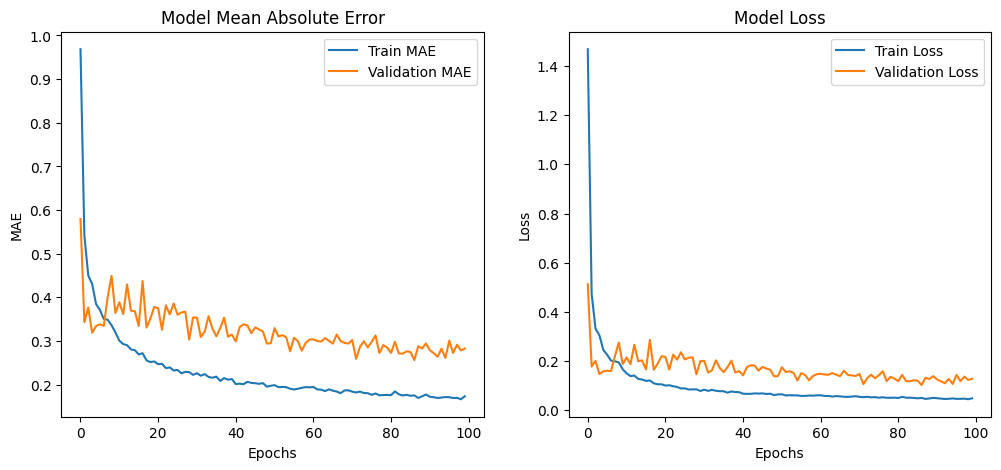

Test MAE: 0.2825484275817871


In [20]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Output results
print(f"Test MAE: {test_mae}")

In [21]:
# Example new student data (modify with actual values)
new_student = pd.DataFrame({
    'Age': [16],
    'Gender': [1],  # Example: 1 for Male, 0 for Female
    'Ethnicity': [2],  # Coded as in the dataset
    'ParentalEducation': [3],
    'StudyTimeWeekly': [10],  # Example: 10 hours per week
    'Absences': [5],  # Example: 5 absences
    'Tutoring': [1],  # Example: 1 (yes)
    'ParentalSupport': [2],
    'Extracurricular': [1],
    'Sports': [0],
    'Music': [1],
    'Volunteering': [0]
})

# Preprocess the new student data
new_student_transformed = preprocessor.transform(new_student)

# Predict GPA
predicted_gpa = model.predict(new_student_transformed)
print(f"Predicted GPA: {predicted_gpa[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted GPA: 2.62


In [22]:
# Example DataFrame with multiple students
new_students = pd.DataFrame({
    'Age': [16, 17],
    'Gender': [1, 0],
    'Ethnicity': [2, 1],
    'ParentalEducation': [3, 2],
    'StudyTimeWeekly': [10, 15],
    'Absences': [5, 3],
    'Tutoring': [1, 0],
    'ParentalSupport': [2, 3],
    'Extracurricular': [1, 0],
    'Sports': [0, 1],
    'Music': [1, 0],
    'Volunteering': [0, 1]
})

# Preprocess and predict
new_students_transformed = preprocessor.transform(new_students)
predicted_gpas = model.predict(new_students_transformed)

# Display results
for i, gpa in enumerate(predicted_gpas):
    print(f"Predicted GPA for student {i+1}: {gpa[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted GPA for student 1: 2.62
Predicted GPA for student 2: 2.65


In [25]:
import joblib
model.save('student_gpa_predictor.h5')
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
